In [155]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [156]:
'''' Device configuration '''
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

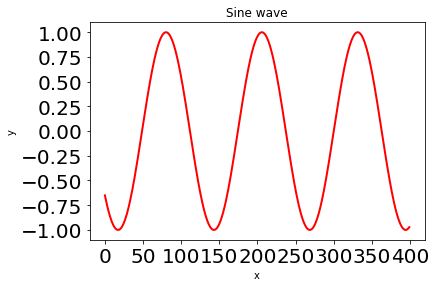

In [157]:
N = 100
L = 400
T = 20

x = np.empty((N, L), np.float32)
x[:] = np.array((range(L)) + np.random.randint(-4*T, 4*T, N).reshape(N, 1))
y = np.sin(x/1.0/T).astype(np.float32)

plt.figure(figsize=(6, 4))
plt.title("Sine wave")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(np.arange(x.shape[1]), y[0,:], 'r', linewidth=2.0)
plt.show()

In [158]:
class LSTMPredictor(nn.Module):
    def __init__(self, n_hidden=51):
        super(LSTMPredictor, self).__init__()
        self.n_hidden = n_hidden
        # lstm1, lstm2, linear
        self.lstm1 = nn.LSTMCell(1, self.n_hidden)
        self.lstm2 = nn.LSTMCell(self.n_hidden, self.n_hidden)
        self.linear = nn.Linear(self.n_hidden, 1)

    def forward(self, x, future=0):
        outputs = []
        n_samples = x.size(0)

        h_t = torch.zeros(n_samples, self.n_hidden, dtype=torch.float32).to(device)
        c_t = torch.zeros(n_samples, self.n_hidden, dtype=torch.float32).to(device)
        h_t2 = torch.zeros(n_samples, self.n_hidden, dtype=torch.float32).to(device)
        c_t2 = torch.zeros(n_samples, self.n_hidden, dtype=torch.float32).to(device)

        for input_t in x.split(1, dim=1):
            # N, 1
            h_t, c_t = self.lstm1(input_t, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs.append(output)

        for i in range(future):
            h_t, c_t = self.lstm1(output, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs.append(output)

        outputs = torch.cat(outputs, dim=1)
        return outputs

Steps 0
loss 0.5100797414779663
loss 0.5033960342407227
loss 0.48440319299697876
loss 0.4691500663757324
loss 0.41239169239997864
loss 0.8218802809715271
loss 0.25948506593704224
loss 0.1356022208929062
loss 1.68121337890625
loss 0.03146369010210037
loss 0.02681751549243927
loss 0.02527802251279354
loss 0.024684453383088112
loss 0.0234987735748291
loss 0.021125346422195435
loss 0.017003139480948448
loss 0.010619724169373512
loss 0.006438331212848425
loss 0.0054317740723490715
loss 0.004781506955623627
test loss 0.0042272829450666904


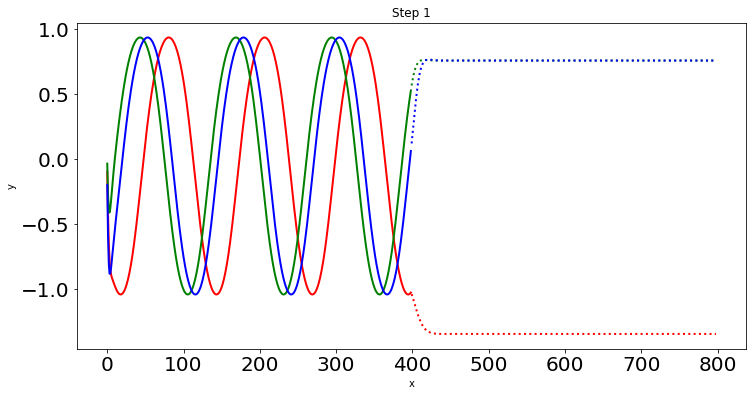

Steps 1
loss 0.004129195585846901
loss 0.0033094172831624746
loss 0.0025723669677972794
loss 0.0022844509221613407
loss 0.002115691313520074
loss 0.0019345185719430447
loss 0.0016621379181742668
loss 0.0013482432113960385
loss 0.0011846661800518632
loss 0.0011532182106748223
loss 0.0011340173659846187
loss 0.0011268331436440349
loss 0.0011138493428006768
loss 0.0010866076918318868
loss 0.001037064241245389
loss 0.000922279607038945
loss 0.000780360191129148
loss 0.0006563419592566788
loss 0.0005928981699980795
loss 0.0005443674162961543
test loss 0.0008417067583650351


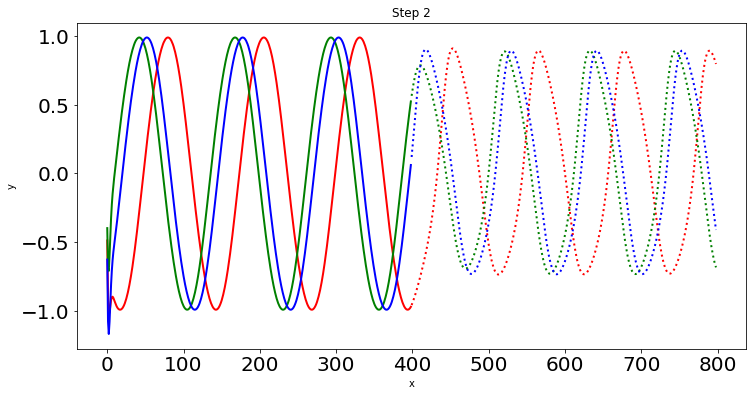

Steps 2
loss 0.0005099980626255274
loss 0.0005025756545364857
loss 0.0005007843719795346
loss 0.0005001666722819209
loss 0.0004994932096451521
loss 0.0004982442478649318
loss 0.0004947357811033726
loss 0.00048756811884231865
loss 0.0004746145277749747
loss 0.0004499218484852463
loss 0.0004139946831855923
loss 0.000369882007362321
loss 0.00036021205596625805
loss 0.00034946820233017206
loss 0.00034004278131760657
loss 0.0003319943498354405
loss 0.0003265920968260616
loss 0.00032420214847661555
loss 0.00032321232720278203
loss 0.00032191144418902695
test loss 0.0003248458669986576


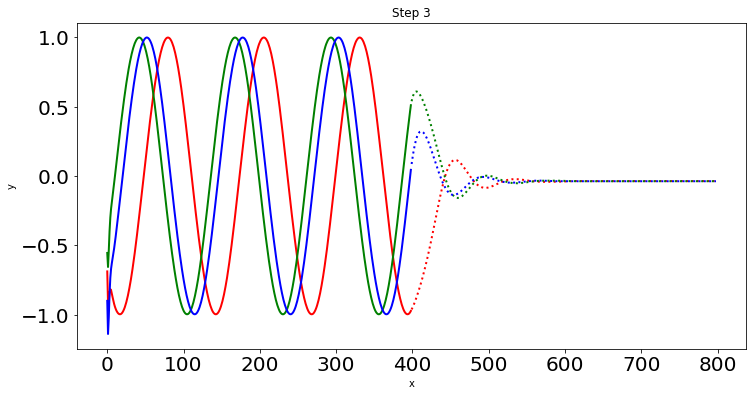

Steps 3
loss 0.00032132226624526083
loss 0.0003194973978679627
loss 0.0003184803354088217
loss 0.00031794700771570206
loss 0.00031772066722624004
loss 0.00031694056815467775
loss 0.00031590802245773375
loss 0.0003090162354055792
loss 0.0003030402003787458
loss 0.0002877283259294927
loss 0.0003576627641450614
loss 0.00024215577286668122
loss 0.00022177437494974583
loss 0.00020000242511741817
loss 0.00018432899378240108
loss 0.00017802260117605329
loss 0.00016835083079058677
loss 0.00015835638623684645
loss 0.0001445127563783899
loss 0.00013197775115258992
test loss 6.182687502587214e-05


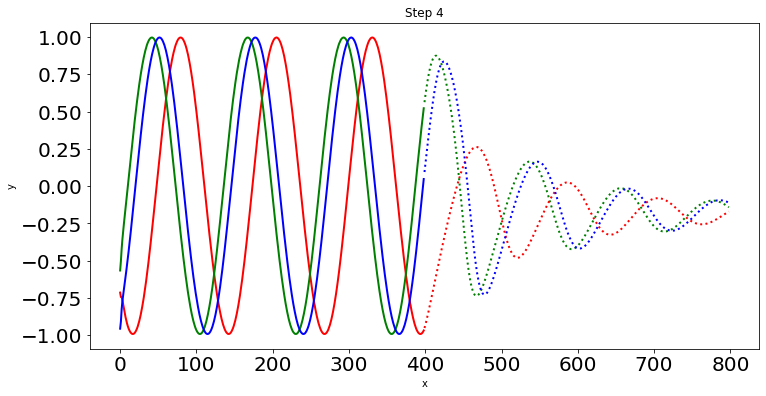

Steps 4
loss 0.00011519292456796393
loss 0.00010257393296342343
loss 9.843569569056854e-05
loss 9.558082820149139e-05
loss 9.192375728162006e-05
loss 9.057616261998191e-05
loss 8.85640547494404e-05
loss 8.740491466596723e-05
loss 8.617925777798519e-05
loss 8.526112651452422e-05
loss 8.461834659101442e-05
loss 8.43961606733501e-05
loss 8.405921835219488e-05
loss 8.384893590118736e-05
loss 8.299413457280025e-05
loss 8.108965266728774e-05
loss 7.626560545759276e-05
loss 7.185019057942554e-05
loss 7.183325942605734e-05
loss 6.854735693195835e-05
test loss 6.652453157585114e-05


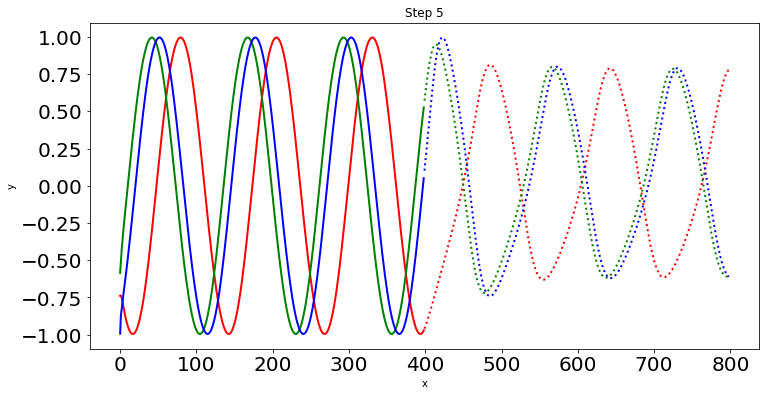

Steps 5
loss 6.796039087930694e-05
loss 6.78400247124955e-05
loss 6.7800676333718e-05
loss 6.739220407325774e-05
loss 6.73091781209223e-05
loss 0.00012190871348138899
loss 6.777510134270415e-05
loss 6.544662755914032e-05
loss 6.424065213650465e-05
loss 6.240110087674111e-05
loss 6.0223152104299515e-05
loss 5.535111267818138e-05
loss 5.1408955187071115e-05
loss 4.971937960362993e-05
loss 4.9265636334894225e-05
loss 4.9022350140148774e-05
loss 4.840043402509764e-05
loss 4.799182352144271e-05
loss 4.728601561510004e-05
loss 4.695168536272831e-05
test loss 4.91964710818138e-05


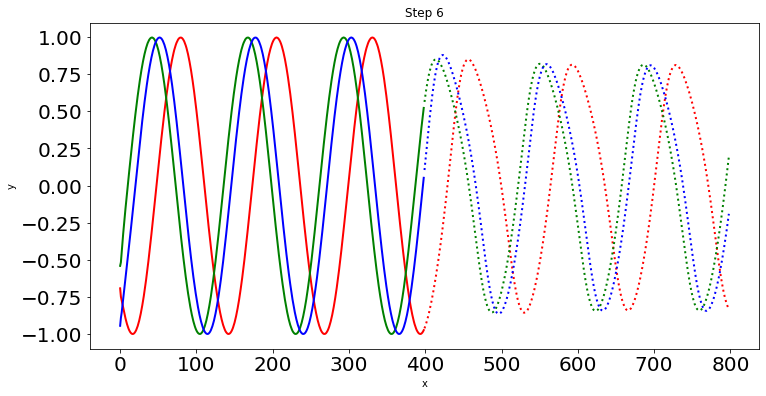

Steps 6
loss 4.7089732106542215e-05
loss 4.687895125243813e-05
loss 4.693309892900288e-05
loss 4.677778997574933e-05
loss 4.6749588364036754e-05
loss 4.6729659516131505e-05
loss 4.673944567912258e-05
loss 6.000310895615257e-05
loss 4.758856812259182e-05
loss 4.685774547397159e-05
loss 4.636104858946055e-05
loss 4.618704042513855e-05
loss 4.549201185000129e-05
loss 4.3931449908996e-05
loss 0.00011622400052146986
loss 3.905776975443587e-05
loss 3.787320383707993e-05
loss 3.478984217508696e-05
loss 3.3748499845387414e-05
loss 3.244721665396355e-05
test loss 3.117282540188171e-05


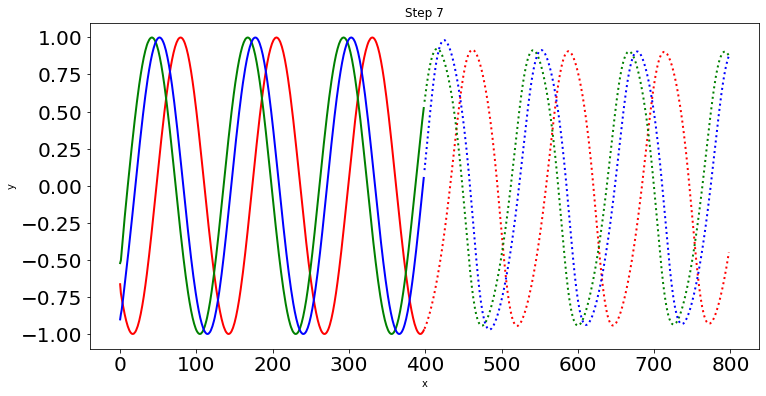

Steps 7
loss 3.166745227645151e-05
loss 3.151028431602754e-05
loss 3.131282937829383e-05
loss 3.123926217085682e-05
loss 3.124761860817671e-05
loss 3.104449206148274e-05
loss 3.0887775210430846e-05
loss 3.07345726469066e-05
loss 3.05446628772188e-05
loss 3.0353881811606698e-05
loss 3.0227813113015145e-05
loss 3.000750621140469e-05
loss 2.9829485356458463e-05
loss 3.021784868906252e-05
loss 2.9937131330370903e-05
loss 2.9440074285957962e-05
loss 2.9306183932931162e-05
loss 2.8070735424989834e-05
loss 2.6558225727058016e-05
loss 5.225872155278921e-05
test loss 2.4996990759973414e-05


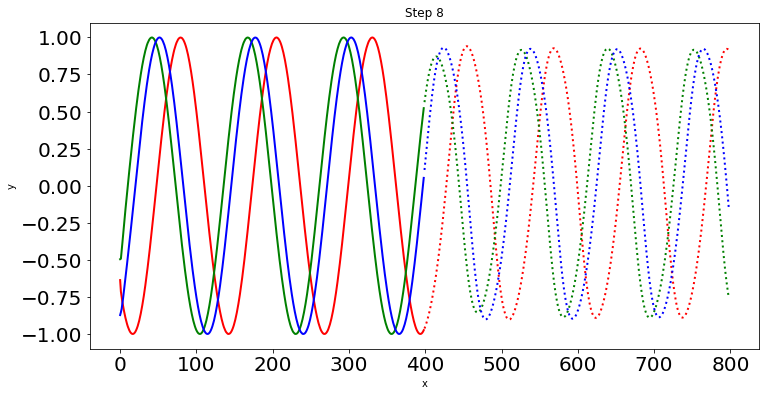

Steps 8
loss 2.582373417681083e-05
loss 2.5119144993368536e-05
loss 2.4723896785872057e-05
loss 2.3823105948395096e-05
loss 2.3454731490346603e-05
loss 2.3254824554896913e-05
loss 2.3187958504422568e-05
loss 2.2904641809873283e-05
loss 2.2872518457006663e-05
loss 2.3394206436933018e-05
loss 2.272393976454623e-05
loss 2.2696947780787013e-05
loss 2.2761503714718856e-05
loss 2.2649972379440442e-05
loss 2.2655201973975636e-05
loss 2.260740438941866e-05
loss 2.286162089149002e-05
loss 2.2629921659245156e-05
loss 2.2586998966289684e-05
loss 2.25966505240649e-05
test loss 2.3077987862052396e-05


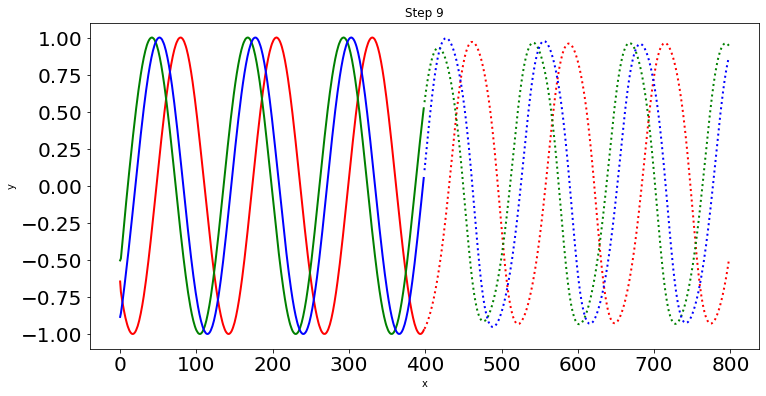

Steps 9
loss 2.2535745301865973e-05
loss 2.246303301944863e-05
loss 2.2414726117858663e-05
loss 2.2259173420025036e-05
loss 2.1956559066893533e-05
loss 2.1874257072340697e-05
loss 2.096820026054047e-05
loss 2.045626206381712e-05
loss 1.8768338122754358e-05
loss 1.8535558410803787e-05
loss 1.8326816643821076e-05
loss 1.7528936950839125e-05
loss 1.719651118037291e-05
loss 1.733180215524044e-05
loss 1.6892321582417935e-05
loss 1.6867694284883328e-05
loss 1.6892561689019203e-05
loss 1.861542659753468e-05
loss 1.6889373000594787e-05
loss 1.6893372958293185e-05
test loss 1.845250153564848e-05


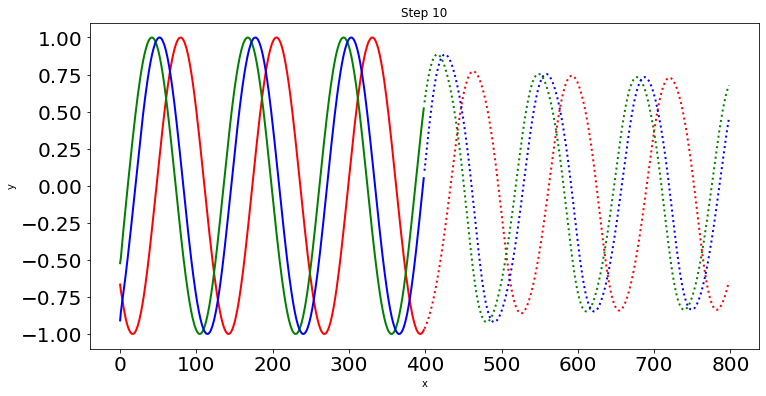

In [159]:
if __name__ == "__main__":
    # y = 100, 1000
    train_input = torch.from_numpy(y[3:, :-1]).to(device)  # 97, 999
    train_target = torch.from_numpy(y[3:, 1:]).to(device)  # 97, 999
    test_input = torch.from_numpy(y[:3, :-1]).to(device)  # 3, 999
    test_target = torch.from_numpy(y[:3, 1:]).to(device)  # 3, 999

    model = LSTMPredictor().to(device)
    criterion = nn.MSELoss().to(device)

    optimizer = optim.LBFGS(model.parameters(), lr=0.8)

    n_steps = 10
    for i in range(n_steps):
        print("Steps", i)

        def closure():
            optimizer.zero_grad()
            out = model(train_input)
            loss = criterion(out, train_target)
            print("loss", loss.item())
            loss.backward()
            return loss
        optimizer.step(closure)

        ''' 預測的部分'''
        with torch.no_grad():
            future = 400
            pred = model(test_input, future=future)
            loss = criterion(pred[:, :-future], test_target)
            print("test loss", loss.item())
            y = pred.detach().cpu().numpy()

        plt.figure(figsize=(12, 6))
        plt.title(f"Step {i+1}")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)

        n = train_input.shape[1]
        def draw(y_i, color):
            # print(f'y_i: {y_i}')
            # print(f'y_i.shape: {len(y_i)}')
            plt.plot(np.arange(n), y_i[:n], color, linewidth=2.0)
            plt.plot(np.arange(n, n+future), y_i[n:], color + ":", linewidth=2.0)

        draw(y[0], 'r')
        draw(y[1], 'g')
        draw(y[2], 'b')
        plt.show()